In [54]:
%load_ext autoreload
%autoreload 2

from __future__ import absolute_import
import data_preparing as dp

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.style.use('classic')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Scikit Learning - nearest neighbor

#### Finding nearest neighbor

Готовим данные. 



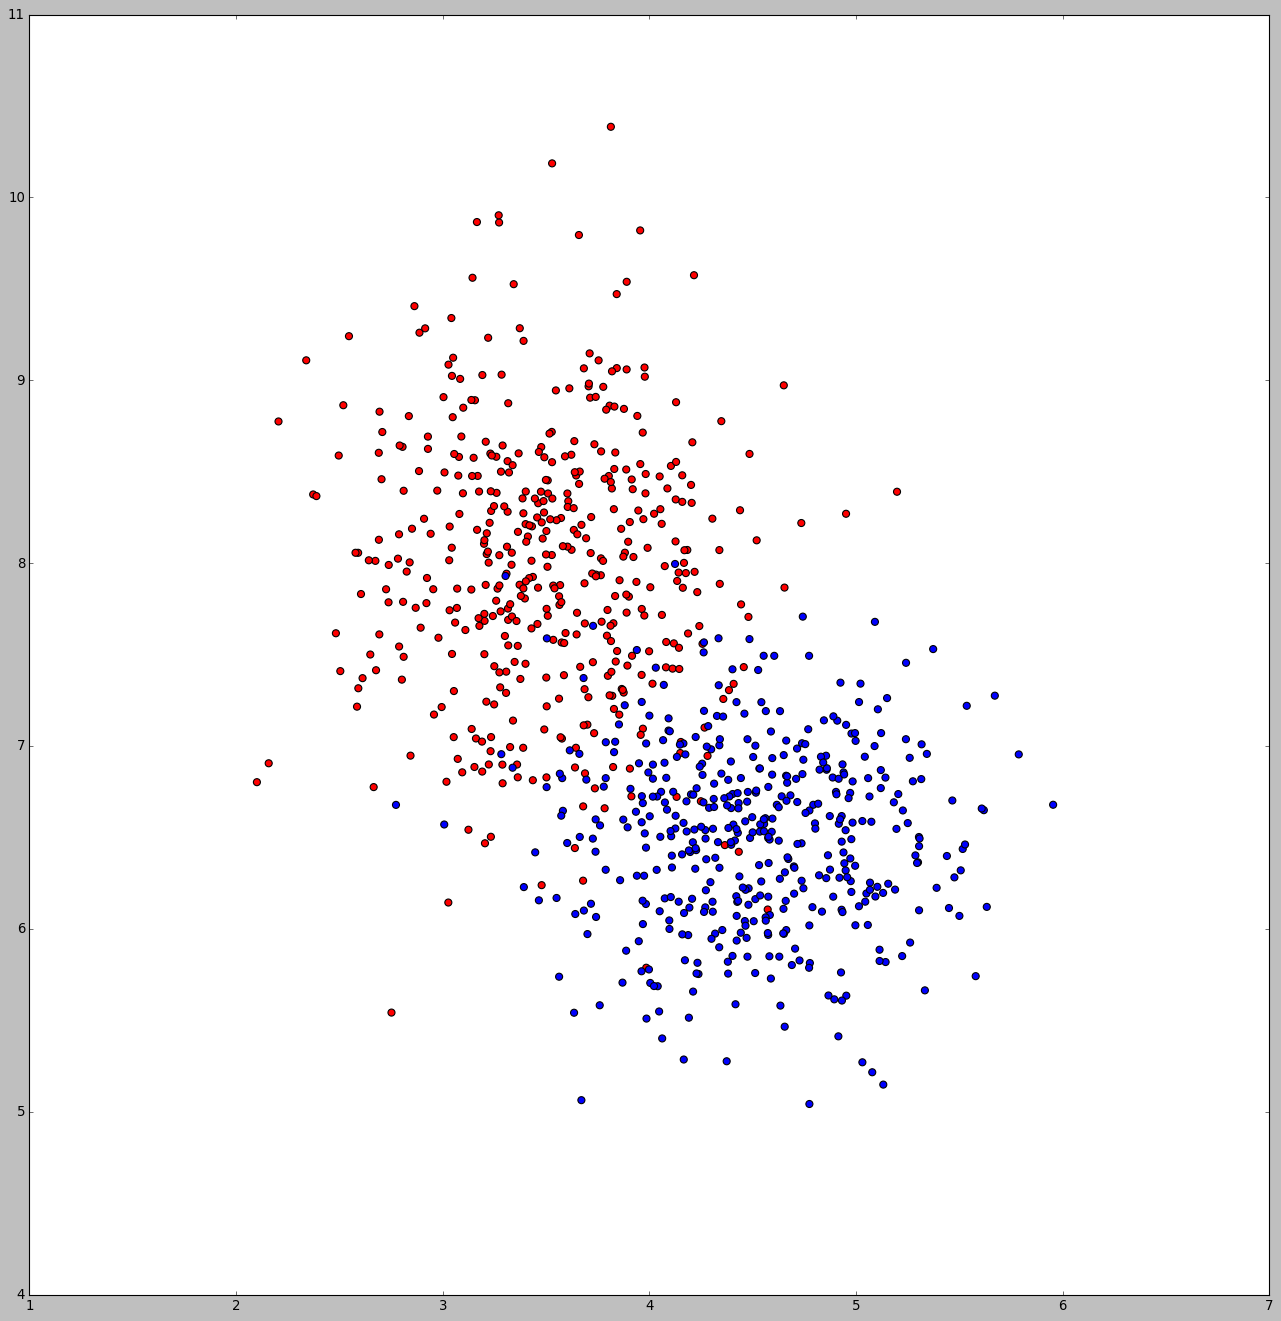

distributed_samples['data','target']


In [56]:
import pandas as pd
from matplotlib.colors import ListedColormap

part_size = 450

dataset = np.vstack([
    np.hstack([dp.get_normal_distributed_features(2,5,6,10, part_size), np.full((part_size,1),0)]),
    np.hstack([dp.get_normal_distributed_features(3,6,5,8,  part_size), np.full((part_size,1),1)]),
])

distributed_samples = {
    'data':dataset[:,:2],
    'target':dataset[:,2]
}

plt.figure(figsize=(20,20))

plt.scatter(
    x=dataset[:,0],
    y=dataset[:,1], 
    c=dataset[:,2],
    cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']),
    s=40
)

plt.show();

print("distributed_samples['data','target']")

Классификация KNN. Обучение модели.

In [59]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from matplotlib.colors import ListedColormap

algoritm = KNeighborsClassifier(
    n_neighbors=3, 
    algorithm='ball_tree'
)

nbrs = algoritm.fit(
    distributed_samples['data'], 
    distributed_samples['target']
)

getClass = nbrs.predict
model = nbrs

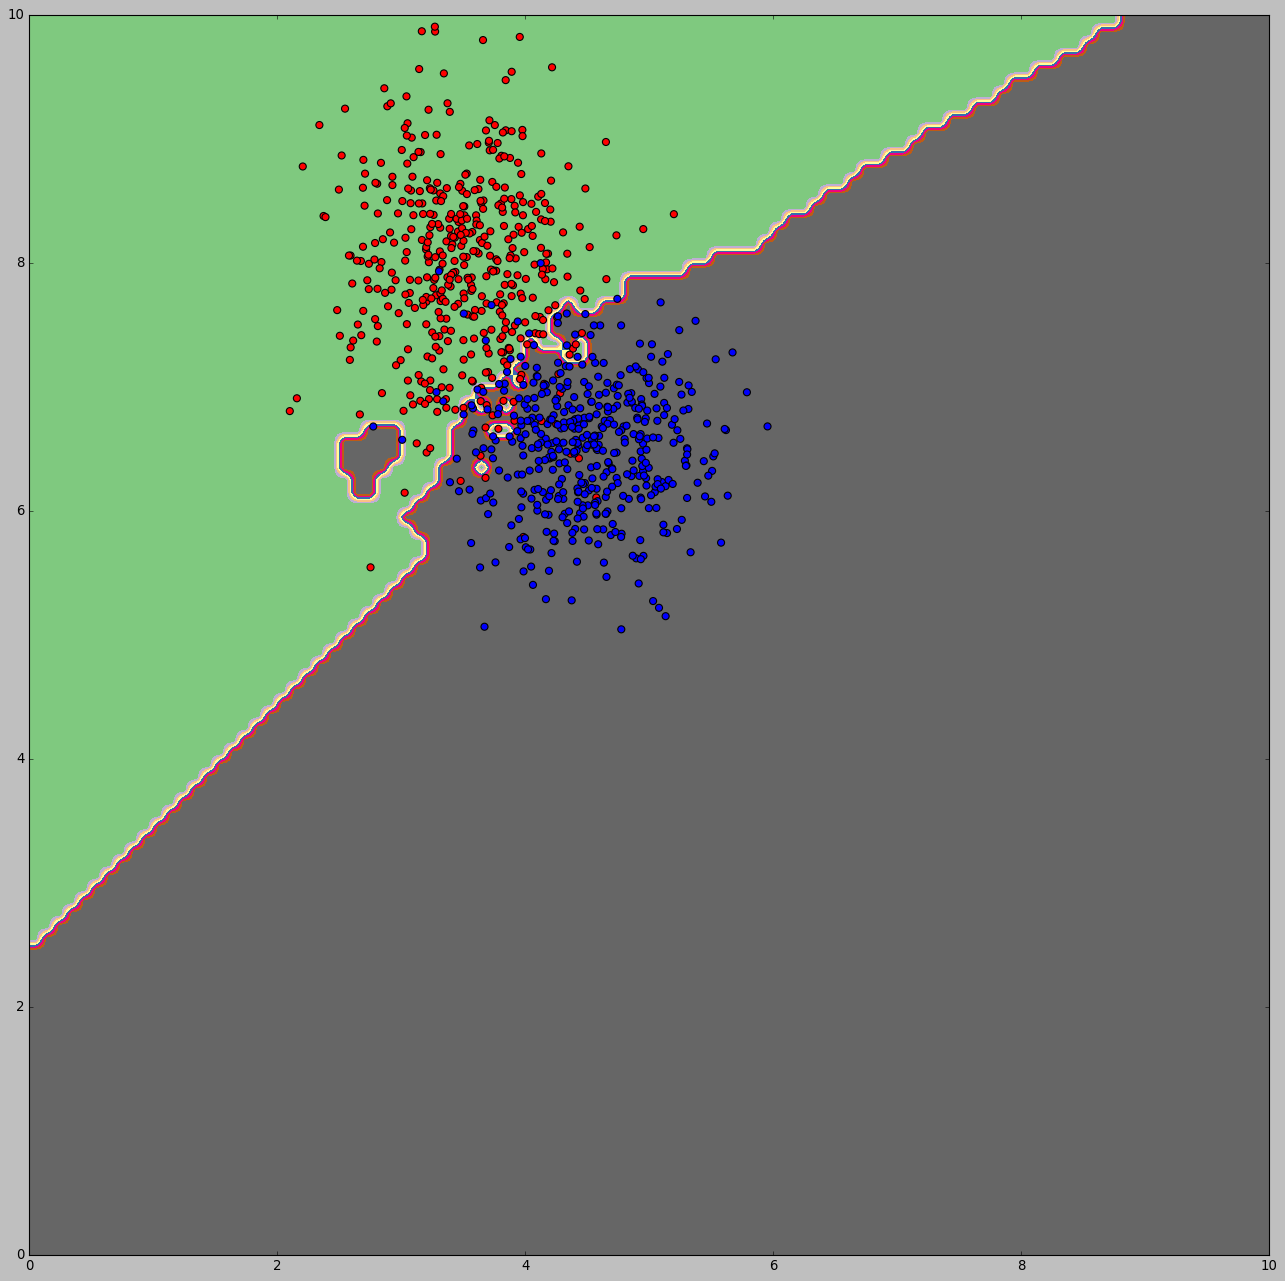

In [60]:
size = 100
x = np.linspace(0, 10, size)
y = np.linspace(0, 10, size)

# Формируем координатную сетку
X, Y = np.meshgrid(x, y)

Xi = X.reshape(size**2)
Yi = Y.reshape(size**2)

data_to_get = np.hstack([Xi[:,np.newaxis],Yi[:,np.newaxis]])

Z = getClass(data_to_get)

Z = Z.reshape((size,size))

plt.figure(figsize=(20,20))

plt.scatter(
    x=distributed_samples['data'][:,0],
    y=distributed_samples['data'][:,1], 
    c=distributed_samples['target'],
    cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']),
    s=40
)

plt.imshow(Z,
           extent=[0, 10, 0, 10],
           origin='lower',
           cmap=plt.cm.Accent);

plt.show();

### Cross-validation

Есть удобные функции разделения данных, например:  
```python
from sklearn.model_selection import train_test_split
```

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    distributed_samples['data'], 
    distributed_samples['target'],
    test_size=0.4,
    random_state=0
)

Так же есть функции у моделей для проверки точности на обучающей и проверяющей выборках

In [63]:
from sklearn.neighbors import KNeighborsClassifier

algoritm = KNeighborsClassifier(
    n_neighbors=1,
    algorithm='ball_tree'
)

nbrs = algoritm.fit(X_train, y_train)

print("Accuracy in test data is: ", nbrs.score(X_test, y_test))

Accuracy in test data is:  0.902777777778


Для вычисления алгоритма cv используется фунциия:  
```python
from sklearn.model_selection import cross_val_score
```

In [64]:
from sklearn.model_selection import cross_val_score

algoritm = KNeighborsClassifier(
    n_neighbors=1,
    algorithm='ball_tree'
)

scores = cross_val_score(
    algoritm, 
    distributed_samples['data'], 
    distributed_samples['target'], 
    cv=100
)

print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.90400 (+/- 0.19984)


По умолчанию используется фунция `score` из модели, но с помощью 
парамтера `scoring` функции `cross_val_score` можно установить другую функцию

Можно составить график зависимости оценки скользящего от коэффициентов модели


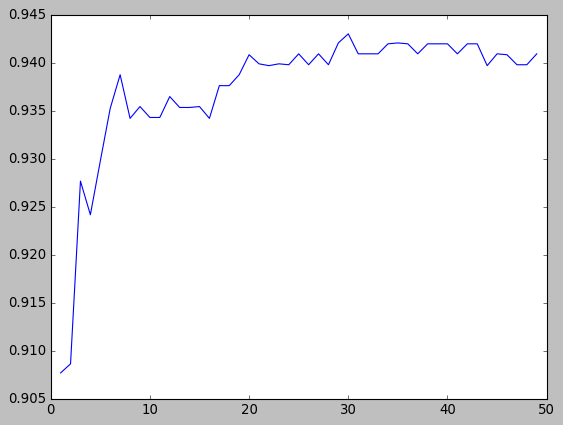

In [75]:
def get_scored_data(start, end):
    for n in range(start, end):
        clf = KNeighborsClassifier(
            n_neighbors=n,
            algorithm='ball_tree'
        )
        mean_score = cross_val_score(
            clf,
            distributed_samples['data'],
            distributed_samples['target'],
            cv=40
        ).mean()
        yield [n, mean_score]


z = np.array(list(get_scored_data(1, 50)))

# plt.figure(figsize=(10,10))

plt.plot(z[:, 0],z[:, 1])

plt.show();